<a href="https://colab.research.google.com/github/narrasriram/EMOTION-RECOGNITION-USING-FINE-TUNED-MODELS-ERFM-/blob/main/Colab%20Model%20building%20Files/Classification/Models%20on%20ISEAR%20Dataset/Fine-tuning%20Distilbert/ktrain_distilbert_with_isear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author**: Shamsul Arefin

**Description**: In this file I implemented the Fine tuning of pretrained DistilBERT Model with the ktrain package. The dataset used is the ISEAR dataset.

**Installing ktrain wrapper library**

In [ ]:
!pip3 install ktrain

     |████████████████████████████████| 25.3MB 130kB/s 
     |████████████████████████████████| 6.8MB 56.6MB/s 
     |████████████████████████████████| 983kB 54.8MB/s 
     |████████████████████████████████| 266kB 52.8MB/s 
     |████████████████████████████████| 1.9MB 47.9MB/s 
     |████████████████████████████████| 1.2MB 41.2MB/s 
     |████████████████████████████████| 471kB 49.7MB/s 
     |████████████████████████████████| 3.3MB 51.2MB/s 
     |████████████████████████████████| 870kB 47.9MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.2-cp37-none-any.whl size=25277794 sha256=a8af3c4ecc799b10aaefa171c4b1bfd35518f3ca92c410e918fd424befea157f
  Stored in directory: /root/.cache/pip/wheels/67/2e/f1/c72afa08df8b2d984b910dea228902ce81dae4511afe9fafd2
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=544f22c3f2284f2a56019c42979b5f369adf721d4da7e4b1e34cecc67544b267
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d4

**Installing other dependecies such as pandas, numpy**

In [ ]:
import pandas as pd
import numpy as np

import ktrain
from ktrain import text

**Mounting google drive storage**

In [ ]:
cd drive/MyDrive/bert-project-data/

/content/drive/MyDrive/bert-project-data


**preprocessing of ISEAR data and splitting data into test&Train**

In [ ]:
from sklearn.model_selection import train_test_split
# data_train = pd.read_csv('./data_train.csv', encoding='utf-8')
data = pd.read_csv('./Isear.csv', encoding='utf-8')
# data_train = pd.read_csv('./Isear.csv', encoding='utf-8')
#data_test = pd.read_csv('./data_test.csv', encoding='utf-8')


X_all = data.Text.tolist()
# X_test = data_train.Text.tolist()

y_all = data.Emotion.tolist()
#y_test = data_train.Emotion.tolist()

#data = data_train.append(data_test, ignore_index=True)

class_names = ['joy', 'sadness', 'fear', 'anger', 'disgust','shame','guilt']


#print('size of validation set: %s' % (len(data_test['Text'])))
#print(data_train.Emotion.value_counts())


X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,test_size=0.2, random_state=4)
print('size of train set: %s' % (len(X_train)))
print('size of test set: %s' % (len(X_test)))
data.head(10)
# SIZE_TRAIN = 1000
# X_test = X_train[-800:]
# y_test = y_train[-800:]
# X_train = X_train[:6800]
# y_train = y_train[:6800]

size of train set: 6132
size of test set: 1534


,Emotion,Text
0,anger,When a boy tried to fool me so he would be OK ...
1,anger,I felt anger when I saw that I was being misle...
2,anger,Once a friend had pushed me and I had fallen o...
3,anger,When I was misleaded by a person who assured t...
4,anger,I don't use to lie to my parets about what I d...
5,anger,During the short period of my unemployment abo...
6,anger,When my chief accused me of an error that I ha...
7,anger,A girl entered in the division where I work an...
8,anger,"When I was dancing with a dame at a social, on..."
9,anger,My mother was ill and asked me to prpare our l...


**Changing string encoding of labels to integers for model preprocessing**

In [ ]:
encoding = {
    'joy': 0,
    'sadness': 1,
    'fear': 2,
    'anger': 3,
    'disgust':4,
    'shame':5,
    'guilt':6
}

# Integer values for each class
y_test_string_backup = y_test.copy()
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

**Preprocessing input data for the DistilBERT model by the library**

In [ ]:
train_t,test_t, preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='distilbert',
                                                                       maxlen=350, 
                                                                       max_features=35000)


preprocessing train...
language: en
train sequence lengths:
	mean : 22
	95percentile : 49
	99percentile : 55


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 22
	95percentile : 49
	99percentile : 54


task: text classification


**Defining model with the preprocessed data**

In [ ]:
model = text.text_classifier('distilbert', train_data=train_t, preproc=preproc)

Is Multi-Label? False
maxlen is 350



done.


**Intializing a learner object from the model to train**

In [ ]:
#This is stable code
learner = ktrain.get_learner(model, train_data=train_t, val_data=test_t, batch_size=6)

**Training the model with 4 epoch and 2e-5 learning rate**

In [ ]:
#This is stable code
val = learner.fit_onecycle(2e-5, 4)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/4
1022/1022 [==============================] - 260s 244ms/step - loss: 1.8223 - accuracy: 0.2692 - val_loss: 1.1086 - val_accuracy: 0.6004
Epoch 2/4
1022/1022 [==============================] - 250s 243ms/step - loss: 0.9718 - accuracy: 0.6769 - val_loss: 0.9060 - val_accuracy: 0.6754
Epoch 3/4
1022/1022 [==============================] - 250s 243ms/step - loss: 0.6223 - accuracy: 0.7833 - val_loss: 0.9213 - val_accuracy: 0.6871
Epoch 4/4
1022/1022 [==============================] - 249s 243ms/step - loss: 0.3537 - accuracy: 0.8965 - val_loss: 0.9543 - val_accuracy: 0.6917


**Validating the model on the test data and getting Confusion Matrix**

In [ ]:
cm = learner.validate(val_data=test_t, class_names=class_names)

              precision    recall  f1-score   support

         joy       0.92      0.88      0.90       236
     sadness       0.69      0.70      0.69       218
        fear       0.74      0.80      0.77       211
       anger       0.66      0.59      0.62       212
     disgust       0.67      0.67      0.67       206
       shame       0.56      0.57      0.57       244
       guilt       0.61      0.63      0.62       207

    accuracy                           0.69      1534
   macro avg       0.69      0.69      0.69      1534
weighted avg       0.69      0.69      0.69      1534



**Plotting the confusion matrix**

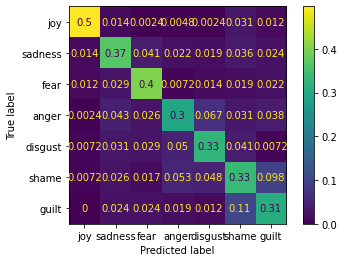

In [ ]:
#Plotting the confusion matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

norm = np.linalg.norm(cm)
normal_array = cm/norm

disp = ConfusionMatrixDisplay(confusion_matrix=normal_array,
                              display_labels=class_names)
#plot_confusion_matrix()


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
disp = disp.plot(include_values=True,
                 cmap='viridis', ax=None, xticks_rotation='horizontal')


**Getting the predictor object from the trained Model**

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

['joy', 'sadness', 'fear', 'anger', 'disgust', 'shame', 'guilt']

**Testing the model predictor with a new sentence**

In [ ]:
import time 

message = 'I just broke up with my boyfriend'

start_time = time.time() 
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

predicted: guilt (0.07)


**Saving the trained model predictor to Google Drive**

In [ ]:
# let's save the predictor for later use
predictor.save("models/distilbert_model-isear/")

**Load the saved model predictor to check if it works**

In [ ]:
#testing if predictor can loaded from storage
predictor = ktrain.load_predictor("models/distilbert_model-isear/")

**Feeding a sentence to the retrieved model predictor**

In [ ]:
#testing again
import time 

message = 'I just broke up with my boyfriend'

start_time = time.time() 
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

predicted: guilt (1.49)


 **Getting Weighted Accuracy Score**

In [ ]:
from sklearn.metrics import balanced_accuracy_score
prediction_y = predictor.predict(X_test)
balanced_accuracy_score(y_test_string_backup, prediction_y) # y_test_string_backup is the y_test in the string label format, because in the above we already converted y_test to a  integer label

0.6908371894382755

**ROC Curves**

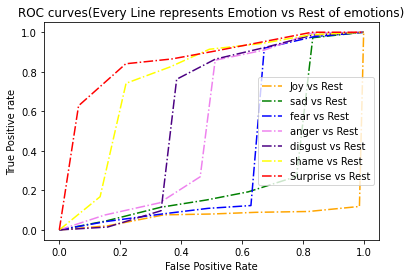

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt


false_positive_rate = {}
true_positive_rate = {}
threshold ={}

y_pred = [encoding[x] for x in prediction_y]
y_test_g = [encoding[x] for x in y_test_string_backup]
number_of_classes = 7

for i in range(number_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = roc_curve(y_test_g, y_pred, pos_label=i)
       
plt.plot(false_positive_rate[0], true_positive_rate[0], linestyle='-.',color='orange', label='Joy vs Rest')
plt.plot(false_positive_rate[1], true_positive_rate[1], linestyle='-.',color='green', label='sad vs Rest')
plt.plot(false_positive_rate[2], true_positive_rate[2], linestyle='-.',color='blue', label='fear vs Rest')
plt.plot(false_positive_rate[3], true_positive_rate[3], linestyle='-.',color='violet', label='anger vs Rest')
plt.plot(false_positive_rate[4], true_positive_rate[4], linestyle='-.',color='indigo', label='disgust vs Rest')
plt.plot(false_positive_rate[5], true_positive_rate[5], linestyle='-.',color='yellow', label='shame vs Rest')
plt.plot(false_positive_rate[6], true_positive_rate[6], linestyle='-.',color='red', label='Surprise vs Rest')
plt.title('ROC curves(Every Line represents Emotion vs Rest of emotions)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=350); 

**ROC AUC Score**

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(y_test_string_backup)

y_test_roc = lb.transform(y_test_string_backup)
y_pred_roc = lb.transform(prediction_y)

In [ ]:
# For Multiclass case
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_roc, y_pred_roc, multi_class='ovo')

0.8175560692339514